## In order to optimize our inventory, we would like to know which films will be rented next month and we are asked to create a model to predict it.

### 1- Create an SQL query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features

### Building 
Target variable_y : title
X values: inventory, customer_id, rent_month, rent_year, film_id, title

In [1]:
# First import the libraries
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
password = getpass.getpass()


········


In [2]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = '''
WITH cte1 as(
       SELECT rental_id, inventory_id as inventory, customer_id,
       date_format(convert(rental_date, date), '%%m') as rent_month,
       date_format(convert(rental_date, date), '%%Y') as rent_year
       FROM rental),
cte2 as (
    SELECT inventory_id, film_id
    FROM inventory),

cte3 as (
SELECT film_id, title, rental_rate, rating
FROM film)
    
SELECT c1.inventory, c1.customer_id, c1.rent_month, c1.rent_year, c2.film_id, c3.title , c3.rental_rate, c3.rating
FROM cte1 c1
JOIN cte2 c2
ON c1.inventory = c2.inventory_id
LEFT JOIN cte3 c3
ON c2.film_id = c3.film_id
ORDER BY c3.title, c1.rent_year DESC, c1.rent_month DESC ;
        '''



### 2- Read the data into a Pandas dataframe

In [3]:
df = pd.read_sql_query(query, engine)
df.head(50)

,inventory,customer_id,rent_month,rent_year,film_id,title,rental_rate,rating
0,1,130,06,2021,1,ACADEMY DINOSAUR,0.99,PG
1,8,34,08,2005,1,ACADEMY DINOSAUR,0.99,PG
2,1,518,08,2005,1,ACADEMY DINOSAUR,0.99,PG
3,1,279,08,2005,1,ACADEMY DINOSAUR,0.99,PG
4,7,92,08,2005,1,ACADEMY DINOSAUR,0.99,PG
5,6,554,08,2005,1,ACADEMY DINOSAUR,0.99,PG
6,4,344,08,2005,1,ACADEMY DINOSAUR,0.99,PG
7,4,301,08,2005,1,ACADEMY DINOSAUR,0.99,PG
8,2,359,08,2005,1,ACADEMY DINOSAUR,0.99,PG
9,3,541,08,2005,1,ACADEMY DINOSAUR,0.99,PG


In [4]:
df

,inventory,customer_id,rent_month,rent_year,film_id,title,rental_rate,rating
0,1,130,06,2021,1,ACADEMY DINOSAUR,0.99,PG
1,8,34,08,2005,1,ACADEMY DINOSAUR,0.99,PG
2,1,518,08,2005,1,ACADEMY DINOSAUR,0.99,PG
3,1,279,08,2005,1,ACADEMY DINOSAUR,0.99,PG
4,7,92,08,2005,1,ACADEMY DINOSAUR,0.99,PG
...,...,...,...,...,...,...,...,...
16040,4579,576,06,2005,1000,ZORRO ARK,4.99,NC-17
16041,4581,235,06,2005,1000,ZORRO ARK,4.99,NC-17
16042,4577,12,05,2005,1000,ZORRO ARK,4.99,NC-17
16043,4579,198,05,2005,1000,ZORRO ARK,4.99,NC-17


### 3- Analyze extracted features and transform them. You may need to encode some categorical variables, or scale numerical variables

In [5]:
df['title'].value_counts()

BUCKET BROTHERHOOD     34
ROCKETEER MOTHER       33
JUGGLER HARDLY         32
RIDGEMONT SUBMARINE    32
GRIT CLOCKWORK         32
                       ..
GLORY TRACY             5
MUSSOLINI SPOILERS      5
HARDLY ROBBERS          4
TRAIN BUNCH             4
MIXED DOORS             4
Name: title, Length: 958, dtype: int64

In [6]:
df.shape

(16045, 8)

In [7]:
df.dtypes

inventory        int64
customer_id      int64
rent_month      object
rent_year       object
film_id          int64
title           object
rental_rate    float64
rating          object
dtype: object

In [8]:
df.describe()

,inventory,customer_id,film_id,rental_rate
count,16045.000000,16045.000000,16045.000000,16045.000000
mean,2291.699782,297.132752,501.077719,2.942509
std,1322.293121,172.452810,288.531551,1.649698
min,1.000000,1.000000,1.000000,0.990000
25%,1154.000000,148.000000,255.000000,0.990000
50%,2291.000000,296.000000,496.000000,2.990000
75%,3433.000000,446.000000,753.000000,4.990000
max,4581.000000,599.000000,1000.000000,4.990000


In [9]:
df.isna().sum()

inventory      0
customer_id    0
rent_month     0
rent_year      0
film_id        0
title          0
rental_rate    0
rating         0
dtype: int64

### 4- Create a query to get the list of films and a boolean indicating if it was rented last month. This would be our target variable

In [10]:
query_2 = '''
select distinct(title),
case
when title in
(select title from monthly_film
where rental_month = 2 and rental_year = 2006) then true
else false
end as last_month_rented
from film'''
df2 = pd.read_sql_query(query_2, engine)
df2


,title,last_month_rented
0,ACADEMY DINOSAUR,0
1,ACE GOLDFINGER,1
2,ADAPTATION HOLES,0
3,AFFAIR PREJUDICE,1
4,AFRICAN EGG,1
...,...,...
995,YOUNG LANGUAGE,0
996,YOUTH KICK,0
997,ZHIVAGO CORE,1
998,ZOOLANDER FICTION,0


In [11]:
# join df and df2

In [12]:
df_new = pd.merge(df, df2, on = 'title')
df_new.head(50)

,inventory,customer_id,rent_month,rent_year,film_id,title,rental_rate,rating,last_month_rented
0,1,130,06,2021,1,ACADEMY DINOSAUR,0.99,PG,0
1,8,34,08,2005,1,ACADEMY DINOSAUR,0.99,PG,0
2,1,518,08,2005,1,ACADEMY DINOSAUR,0.99,PG,0
3,1,279,08,2005,1,ACADEMY DINOSAUR,0.99,PG,0
4,7,92,08,2005,1,ACADEMY DINOSAUR,0.99,PG,0
5,6,554,08,2005,1,ACADEMY DINOSAUR,0.99,PG,0
6,4,344,08,2005,1,ACADEMY DINOSAUR,0.99,PG,0
7,4,301,08,2005,1,ACADEMY DINOSAUR,0.99,PG,0
8,2,359,08,2005,1,ACADEMY DINOSAUR,0.99,PG,0
9,3,541,08,2005,1,ACADEMY DINOSAUR,0.99,PG,0


In [13]:
df_new.dtypes

inventory              int64
customer_id            int64
rent_month            object
rent_year             object
film_id                int64
title                 object
rental_rate          float64
rating                object
last_month_rented      int64
dtype: object

In [14]:
#Drop title because it is duplicate to film_id
# Drop customer_id because it is a unique id
df_new = df_new.drop(['customer_id', 'title'], axis =1)
df_new

,inventory,rent_month,rent_year,film_id,rental_rate,rating,last_month_rented
0,1,06,2021,1,0.99,PG,0
1,8,08,2005,1,0.99,PG,0
2,1,08,2005,1,0.99,PG,0
3,1,08,2005,1,0.99,PG,0
4,7,08,2005,1,0.99,PG,0
...,...,...,...,...,...,...,...
16040,4579,06,2005,1000,4.99,NC-17,0
16041,4581,06,2005,1000,4.99,NC-17,0
16042,4577,05,2005,1000,4.99,NC-17,0
16043,4579,05,2005,1000,4.99,NC-17,0


In [15]:
df_new['rental_rate'].value_counts()

0.99    5653
4.99    5272
2.99    5120
Name: rental_rate, dtype: int64

In [16]:
# Change rental_rate to categorical
df_new['rental_rate'] = df_new['rental_rate'].astype('object')
df_new['rent_month'] = df_new['rent_month'].astype('int')
df_new['rent_year'] = df_new['rent_year'].astype('int')

### 5- Create a logistic regression model to predict this variable from the cleaned data

In [17]:
X = df_new.drop('last_month_rented', axis =1 )
y = df_new['last_month_rented']

In [18]:
X = pd.get_dummies(X)
X

,inventory,rent_month,rent_year,film_id,rental_rate_0.99,rental_rate_2.99,rental_rate_4.99,rating_G,rating_NC-17,rating_PG,rating_PG-13,rating_R
0,1,6,2021,1,1,0,0,0,0,1,0,0
1,8,8,2005,1,1,0,0,0,0,1,0,0
2,1,8,2005,1,1,0,0,0,0,1,0,0
3,1,8,2005,1,1,0,0,0,0,1,0,0
4,7,8,2005,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16040,4579,6,2005,1000,0,0,1,0,1,0,0,0
16041,4581,6,2005,1000,0,0,1,0,1,0,0,0
16042,4577,5,2005,1000,0,0,1,0,1,0,0,0
16043,4579,5,2005,1000,0,0,1,0,1,0,0,0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
y

0        0
1        0
2        0
3        0
4        0
        ..
16040    0
16041    0
16042    0
16043    0
16044    0
Name: last_month_rented, Length: 16045, dtype: int64

### 6- Evaluate the results (calculate the score of the model)

In [21]:
classification = LogisticRegression(random_state=42,  multi_class='multinomial', max_iter=500)
classification.fit(X_train, y_train)

LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42)

In [22]:
classification.score(X_test, y_test) # this is clearly something went wrong... :-()

0.7980679339358056

In [23]:
predictions = classification.predict(X_test)

pd.Series(predictions).value_counts()

0    3197
1      12
dtype: int64

In [24]:
y_test.value_counts()

0    2549
1     660
Name: last_month_rented, dtype: int64

<AxesSubplot:>

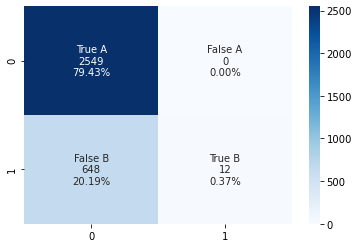

In [26]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True A', 'False A',
               'False B', 'True B']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')